# pretrained Nbeats model using all seasonality data 
---

In [17]:
# pretrain에 이용할 도메인 데이터 전처리는 사전 모듈에 저장
from m4databasis import base_domain,zt_in,zt_out,M4Meta,inputsize # 도메인 데이터
from target_data_electronic import * # 타겟데이터

In [5]:
from nbeats_keras.model import NBeatsNet as NBeatsKeras
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#from nbeats_pytorch.model import NBeatsNet as NBeatsPytorch
from keras.optimizers import RMSprop, Adam

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
# 모든 계절성분 m4 시계열 데이터를 기학습 모델에 적합
# minmax 스케일링을 이용, 전체 데이터프레임(input, output 모두)에 적용
# 소스데이터는 pretrain한 데이터의 분포가 같다고 보기 어려워 따로 스케일링 적용
# 인풋 12, 아웃풋 6의 seq2seq 문제

# pretrained model

- m4데이터 모든 계절성분 데이터를 적합
- 각 계절성분마다 각각 horizon과 inputsize가 다르다
- 다른 계절성 데이터 적합시 input과 output 차원이 바뀌게끔 되어있음 

In [58]:
K.clear_session()
history_lst = [] 
for i in range(len(M4Meta.seasonal_patterns)):
    input_dim, output_dim =  1, 1
    #backcast=inputsize
    #forecast = M4Meta.horizons_map['Yearly']

    model= NBeatsKeras( backcast_length=inputsize[i], forecast_length=M4Meta.horizons[i], input_dim=input_dim,
                   output_dim=output_dim,stack_types=(NBeatsKeras.TREND_BLOCK,NBeatsKeras.TREND_BLOCK,NBeatsKeras.TREND_BLOCK,
                                                      NBeatsKeras.SEASONALITY_BLOCK,NBeatsKeras.SEASONALITY_BLOCK,NBeatsKeras.SEASONALITY_BLOCK)
                   ,nb_blocks_per_stack=4, thetas_dim=(1,2,2,4,4,4),
                   share_weights_in_stack=True, hidden_layer_units=128)
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=optimizer )
    early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=False)
#checkpoint = ModelCheckpoint('best_model.h9', monitor='loss', save_best_only=True, mode='max', verbose=1)
#model.save('best_model.h9')
    history = model.fit(zt_in[i],zt_out[i],
                    epochs=50, batch_size=32,
                    callbacks=[early_stop])
    history_lst.append(history)

Epoch 1/50
719/719 [==============================] - 17s 19ms/step - loss: 2.8768e-04
Epoch 2/50
719/719 [==============================] - 14s 19ms/step - loss: 1.6767e-05
Epoch 3/50
719/719 [==============================] - 13s 19ms/step - loss: 1.5421e-05
Epoch 4/50
719/719 [==============================] - 14s 19ms/step - loss: 1.6154e-05
Epoch 5/50
719/719 [==============================] - 14s 19ms/step - loss: 1.4478e-05
Epoch 6/50
719/719 [==============================] - 14s 19ms/step - loss: 1.3611e-05
Epoch 7/50
719/719 [==============================] - 14s 19ms/step - loss: 1.3394e-05
Epoch 8/50
719/719 [==============================] - 14s 19ms/step - loss: 1.3030e-05
Epoch 9/50
719/719 [==============================] - 14s 19ms/step - loss: 1.3271e-05
Epoch 10/50
719/719 [==============================] - 14s 19ms/step - loss: 1.1553e-05
Epoch 11/50
719/719 [==============================] - 14s 19ms/step - loss: 1.1543e-05
Epoch 12/50
719/719 [====================

In [90]:

# 리스트 안에 있는 여러 리스트를 하나의 긴 시퀀스 어레이로 결합
concatenated_array = np.concatenate([history_lst[i].history['loss'] for i in range(len(history_lst))])

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11708\1578045801.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  history_nbeats = np.array([history_lst[i].history['loss'] for i in range(len(history_lst))]).flatten()


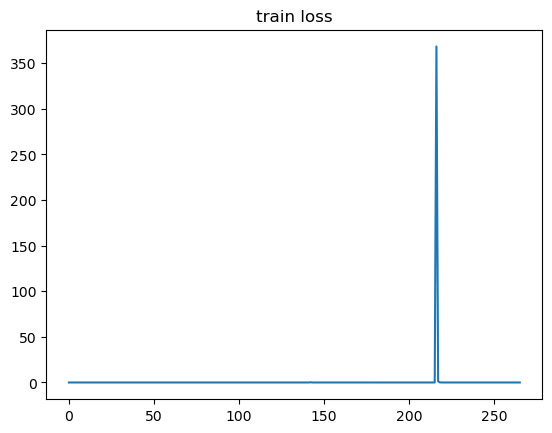

In [91]:
#history_nbeats = np.array([history_lst[i].history['loss'] for i in range(len(history_lst))]).flatten()
plt.plot(concatenated_array)
plt.title('train loss')
plt.show()

In [92]:
# 차원 맞추기 fitting
input_dim, output_dim =  1, 1
model= NBeatsKeras( backcast_length=12, forecast_length=6, input_dim=input_dim,
                   output_dim=output_dim,stack_types=(NBeatsKeras.TREND_BLOCK,NBeatsKeras.TREND_BLOCK,
                                                      NBeatsKeras.SEASONALITY_BLOCK,NBeatsKeras.SEASONALITY_BLOCK)
                   ,nb_blocks_per_stack=4, thetas_dim=(1,2,4,4),
                   share_weights_in_stack=True, hidden_layer_units=128)
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer )
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=False)
model.fit(zt_in[0],zt_out[0],
                    epochs=10, batch_size=64,
                    callbacks=[early_stop])


Epoch 1/10
360/360 [==============================] - 17s 40ms/step - loss: 1.8692e-04
Epoch 2/10
360/360 [==============================] - 14s 40ms/step - loss: 1.2992e-05
Epoch 3/10
360/360 [==============================] - 15s 41ms/step - loss: 1.3316e-05
Epoch 4/10
360/360 [==============================] - 15s 41ms/step - loss: 1.1777e-05
Epoch 5/10
360/360 [==============================] - 14s 40ms/step - loss: 1.1099e-05
Epoch 6/10
360/360 [==============================] - 14s 40ms/step - loss: 1.1881e-05
Epoch 7/10
360/360 [==============================] - 14s 40ms/step - loss: 1.2040e-05
Epoch 8/10
360/360 [==============================] - 14s 40ms/step - loss: 1.1962e-05
Epoch 9/10
360/360 [==============================] - 14s 40ms/step - loss: 1.1370e-05
Epoch 10/10
360/360 [==============================] - 14s 40ms/step - loss: 1.0793e-05


---
# 사전학습모델 반복 초기화 적합

In [18]:
from keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input

In [20]:
backcast_length = 12
theta_dim1, theta_dim2 = 64,6
forecast_length = 6
unit=128

In [93]:
nbeat_lst=[]
nbeat_time = []
from sklearn.metrics import mean_squared_error
for  i in range(50):
    K.clear_session()
    for layer in model.layers:
        layer.trainable = True
    pretrained_layers = model.layers[:-1]
    pretrained_model = Model(inputs=model.input, outputs=pretrained_layers[-1].output)


    input1 = Input(shape=(backcast_length,1))
    pretrained_output = pretrained_model(input1)
    pretrained_output_reshaped = Reshape((forecast_length,-1))(pretrained_output)

# LSTM layer
    lstm_output = LSTM(128)(pretrained_output_reshaped )
#concatenated_output = Concatenate()([pretrained_output_reshaped, lstm_output])

# Dense layer
    dense_output = Dense(6)(lstm_output )

    model_combined = Model(inputs=input1, outputs=dense_output)
    model_combined.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='loss', patience=10, verbose=0, restore_best_weights=False)
    nbeat_time1 = time.time()
    history2 = model_combined.fit(target_ele_X_train,target_ele_y_train,validation_data=[target_ele_X_test,target_ele_y_test],
                             epochs=30, batch_size=2,
                             callbacks=[early_stop], verbose=0)
    nbeat_time2 = time.time()
    total_training_time0 =nbeat_time2- nbeat_time1
    nbeat_pred = model_combined.predict(target_ele_X_test)
    nbeat_mse=np.mean([mean_squared_error(target_ele_y_test[i].flatten(),nbeat_pred[i].flatten()) for i in range(len(target_ele_y_test))])
    nbeat_lst.append(nbeat_mse)
    nbeat_time.append(total_training_time0)

1/1 [==============================] - 1s 974ms/step


# non pretrained nbeats model
- pretrianed model의 하이퍼파라미터와 동일하게 진행
---

In [105]:
nbeat_lst2=[]
nbeat_time2 = []
for i in range(50):
    K.clear_session()
    nonbeats= NBeatsKeras( backcast_length=inputsize[0], forecast_length=M4Meta.horizons[0], input_dim=input_dim,
                   output_dim=output_dim,stack_types=(NBeatsKeras.TREND_BLOCK,NBeatsKeras.TREND_BLOCK,NBeatsKeras.TREND_BLOCK,
                                                      NBeatsKeras.SEASONALITY_BLOCK,NBeatsKeras.SEASONALITY_BLOCK,NBeatsKeras.SEASONALITY_BLOCK)
                   ,nb_blocks_per_stack=4, thetas_dim=(1,2,2,4,4,4),
                   share_weights_in_stack=True, hidden_layer_units=128)
    optimizer = Adam(learning_rate=0.001)
    nonbeats.compile(loss='mse', optimizer=optimizer )
    early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=False)
    nonbeat_time1 = time.time()
    history3 = nonbeats.fit(target_ele_X_train,target_ele_y_train,validation_data=[target_ele_X_test,target_ele_y_test],
                             epochs=30, batch_size=2,
                             callbacks=[early_stop], verbose=0)
    nonbeat_time2 = time.time()
    no_total_training_time =nonbeat_time2- nonbeat_time1
    nbeat_pred2 = nonbeats.predict(target_ele_X_test)
    nbeat_mse2=np.mean([mean_squared_error(target_ele_y_test[i].flatten(),nbeat_pred2[i].flatten()) for i in range(len(target_ele_y_test))])
    nbeat_lst2.append(nbeat_mse2)
    nbeat_time2.append(no_total_training_time)

Epoch 28: early stopping
1/1 [==============================] - 1s 1s/step
Epoch 24: early stopping
1/1 [==============================] - 1s 1s/step
Epoch 25: early stopping
1/1 [==============================] - 1s 1s/step
Epoch 30: early stopping
1/1 [==============================] - 1s 1s/step
Epoch 27: early stopping
1/1 [==============================] - 1s 1s/step
Epoch 28: early stopping
1/1 [==============================] - 1s 1s/step
Epoch 24: early stopping
1/1 [==============================] - 1s 1s/step
Epoch 20: early stopping
1/1 [==============================] - 1s 1s/step
Epoch 27: early stopping
1/1 [==============================] - 1s 1s/step
Epoch 27: early stopping
1/1 [==============================] - 1s 1s/step
Epoch 30: early stopping
1/1 [==============================] - 1s 1s/step
Epoch 24: early stopping
1/1 [==============================] - 1s 1s/step
Epoch 26: early stopping
1/1 [==============================] - 1s 1s/step
Epoch 30: early stopping


# lstm 반복 적합
----

In [49]:
lstm_lst=[]
lstm_time = []
for i in range(50):
    K.clear_session()
    modelnon0 = Sequential() # Sequeatial Model
    modelnon0.add(LSTM(128, return_sequences=False,input_shape=(12, 1)))# (timestep, feature)
    modelnon0.add(Dense(6)) # output = 1
    modelnon0.compile(loss='mse', optimizer='adam')
    early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1
                          )

    lstm_time1 = time.time()
    lstm_history= modelnon0.fit(target_ele_X_train,target_ele_y_train,validation_data=[target_ele_X_test,target_ele_y_test], epochs=30,
          batch_size=2, verbose=0, callbacks=[early_stop])
    lstm_time2 = time.time()
    
    lstm_pred = modelnon0.predict(target_ele_X_test)
    lstm_mse=np.mean([mean_squared_error(target_ele_y_test[i].flatten(),lstm_pred[i].flatten()) for i in range(len(target_ele_y_test))])
    total_training_time1 =lstm_time2- lstm_time1
    
    lstm_time.append(total_training_time1)
    lstm_lst.append(lstm_mse)

1/1 [==============================] - 0s 266ms/step


---

# test data MSE 히스토그램

- 테스트셋을 50번 반복적합하여 MSE를 측정
- 반복적합시 모델 초기화

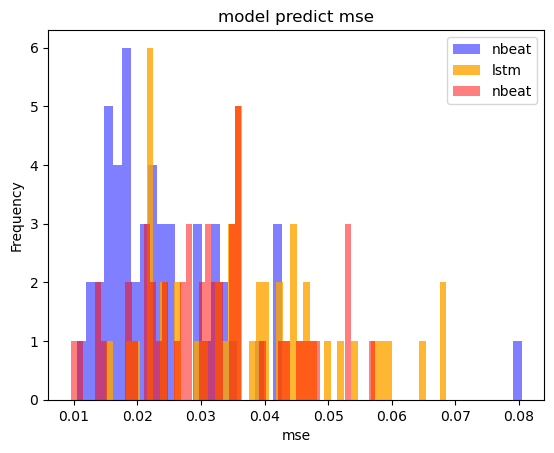

In [109]:
bins = 50

plt.hist(nbeat_lst, bins=bins, alpha=0.5, label='nbeat', color='blue')
plt.hist(lstm_lst, bins=bins, alpha=0.8, label='lstm', color='orange')
plt.hist(nbeat_lst2, bins=bins, alpha=0.5, label='nbeat', color='red')
plt.xlabel('mse')
plt.ylabel('Frequency')
plt.title('model predict mse')
plt.legend()
plt.show()

In [113]:
np.mean(nbeat_lst),np.mean(lstm_lst),np.mean(nbeat_lst2)

(0.02442309203941031, 0.03815129069171694, 0.031200036343208216)

---

# 모델 적합 시간

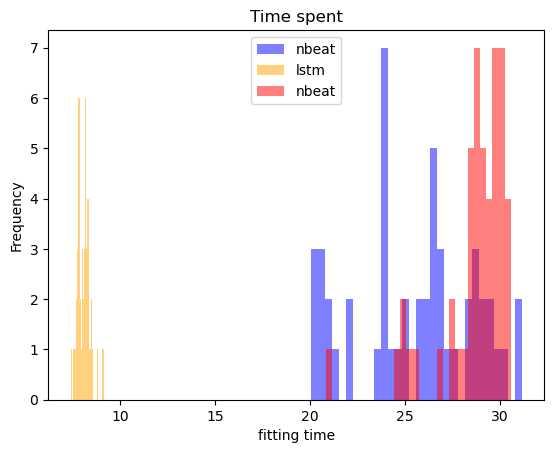

In [115]:
bins = 30

plt.hist(nbeat_time, bins=bins, alpha=0.5, label='nbeat', color='blue')
plt.hist(lstm_time, bins=bins, alpha=0.5, label='lstm', color='orange')
plt.hist(nbeat_time2, bins=bins, alpha=0.5, label='nbeat', color='red')
plt.xlabel('fitting time')
plt.ylabel('Frequency')
plt.title('Time spent')
plt.legend()
plt.show()